# Lab 06: Time Series Visualization

**Objectives**

- Understand time-series characteristics and structures.
- Learn to visualize temporal data using line, rolling average, and LoESS plots.
- Explore decomposition, multiple series, and connected scatter plots (phase plots).
- Identify patterns, trends, and seasonality.
- Create interactive time-series visualizations using Plotly.

## Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

# Time Series

A **time series** is a sequence of observations indexed by time (daily, monthly, yearly, etc.). Time *imposes order, continuity, and temporal structure.*

## Generate Time Series Data

In [3]:
n = 200

dates = pd.date_range(start='2022-01-01', periods=n)
values = np.cumsum(np.random.randn(n)) + 50
series = pd.DataFrame({'Date': dates, 'Value': values})
series.set_index('Date', inplace=True)

In [4]:
series

,Value
Date,
2022-01-01,51.903536
2022-01-02,51.656437
2022-01-03,51.701414
2022-01-04,53.025608
2022-01-05,52.826258
...,...
2022-07-15,41.899369
2022-07-16,39.801913
2022-07-17,38.910893


# Scatter Plot

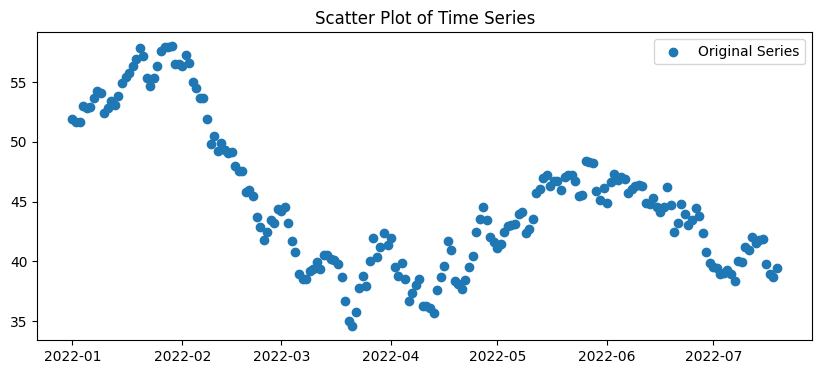

In [5]:
plt.figure(figsize=(10,4))
plt.scatter(series.index, series['Value'], label='Original Series', color='C0')
plt.legend()
plt.title('Scatter Plot of Time Series')
plt.show()

# Line Plot

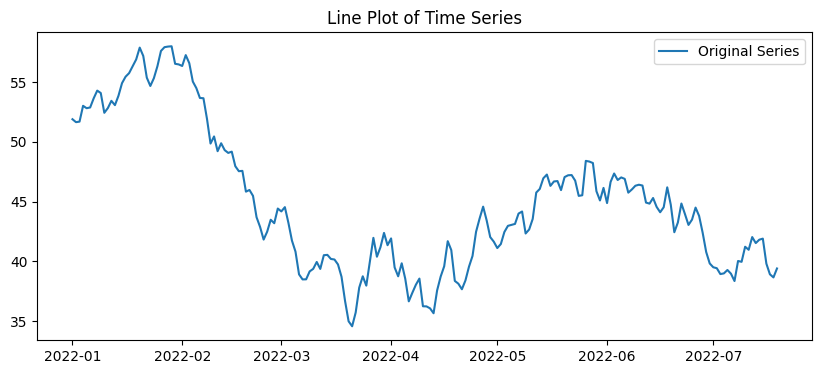

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series.index, series['Value'], label='Original Series', color='C0')
plt.legend()
plt.title('Line Plot of Time Series')
plt.show()

# Moving Average

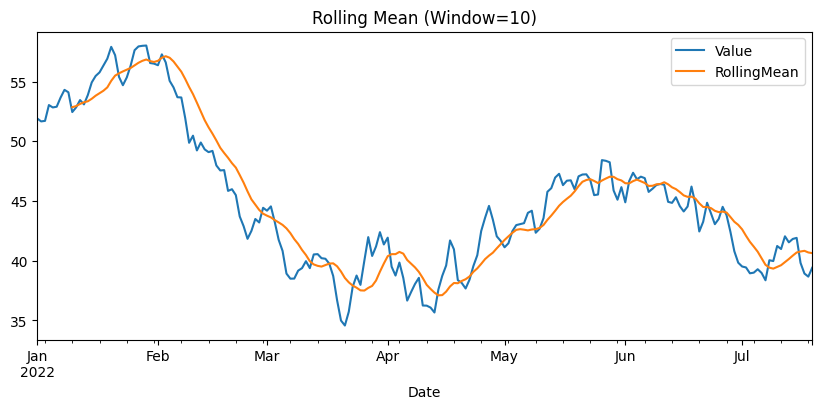

In [7]:
series['RollingMean'] = series['Value'].rolling(window=10).mean()
series[['Value', 'RollingMean']].plot(figsize=(10,4), title='Rolling Mean (Window=10)')
plt.show()

## Task: Experiment with moving average using different datasets and different window sizes

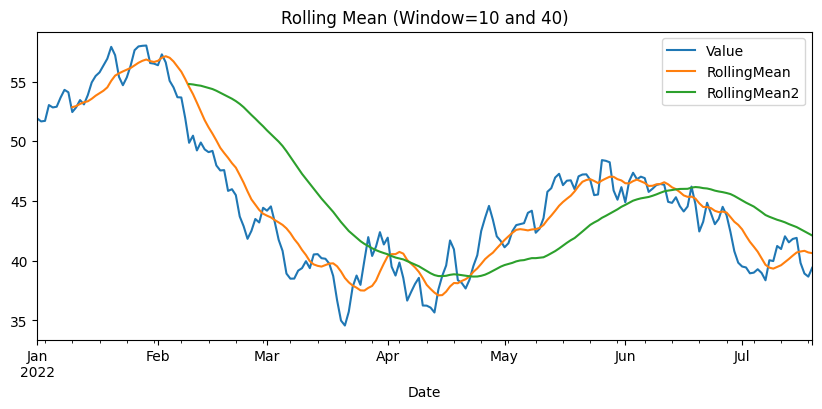

In [16]:
## YOUR CODE HERE
series['RollingMean2'] = series['Value'].rolling(window=40).mean()
series[['Value', 'RollingMean', 'RollingMean2']].plot(figsize=(10,4), title='Rolling Mean (Window=10 and 40)')
plt.show()

# LoESS Smoothing

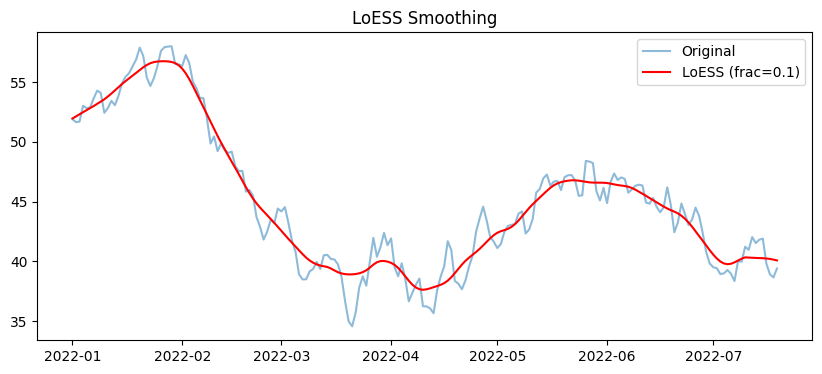

In [9]:
smoothed = lowess(series['Value'], np.arange(len(series['Value'])), frac=0.1)
plt.figure(figsize=(10,4))
plt.plot(series.index, series['Value'], label='Original', alpha=0.5)
plt.plot(series.index, smoothed[:,1], label='LoESS (frac=0.1)', color='red')
plt.legend(); plt.title('LoESS Smoothing')
plt.show()

In [17]:
smoothed

array([[  0.        ,  51.9650273 ],
       [  1.        ,  52.14317137],
       [  2.        ,  52.31809761],
       [  3.        ,  52.49053829],
       [  4.        ,  52.66210009],
       [  5.        ,  52.83458581],
       [  6.        ,  53.01009489],
       [  7.        ,  53.19115375],
       [  8.        ,  53.37974479],
       [  9.        ,  53.57240832],
       [ 10.        ,  53.80549601],
       [ 11.        ,  54.05395579],
       [ 12.        ,  54.31781458],
       [ 13.        ,  54.58769898],
       [ 14.        ,  54.84954494],
       [ 15.        ,  55.09580823],
       [ 16.        ,  55.3284862 ],
       [ 17.        ,  55.55774761],
       [ 18.        ,  55.79018595],
       [ 19.        ,  56.02381669],
       [ 20.        ,  56.25060531],
       [ 21.        ,  56.44876914],
       [ 22.        ,  56.59627945],
       [ 23.        ,  56.68783697],
       [ 24.        ,  56.73676385],
       [ 25.        ,  56.75862182],
       [ 26.        ,  56.76158425],
 

## Task: Experiment with frac

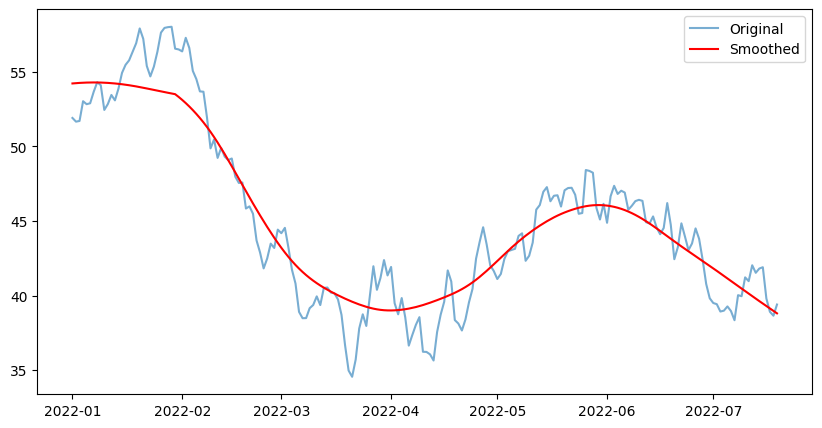

In [24]:
## YOUR CODE HERE

smoothed = lowess(series['Value'], np.arange(len(series)), frac=0.3)
plt.figure(figsize=(10,5))
plt.plot(series.index, series['Value'], label = 'Original', alpha = .6)
plt.plot(series.index, smoothed[:, 1], label = 'Smoothed', color = 'red')
plt.legend()
plt.show()

# Multiple Response Time Series

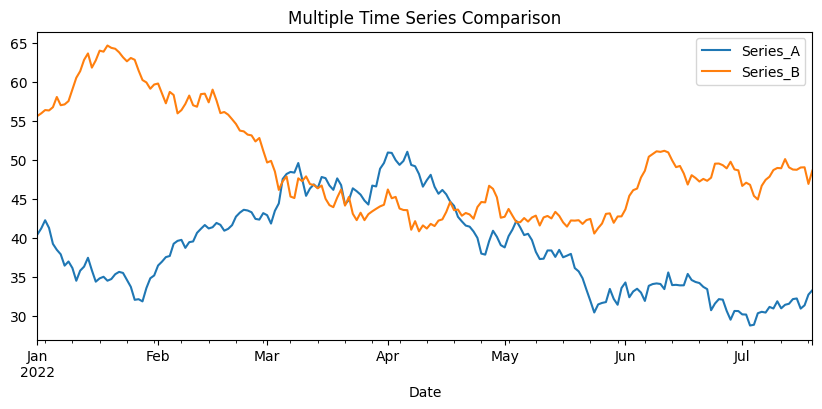

In [11]:
series2 = pd.DataFrame({
  'Date': dates,
  'Series_A': np.cumsum(np.random.randn(200)) + 40,
  'Series_B': np.cumsum(np.random.randn(200)) + 55
}).set_index('Date')

series2.plot(figsize=(10,4), title='Multiple Time Series Comparison')
plt.show()

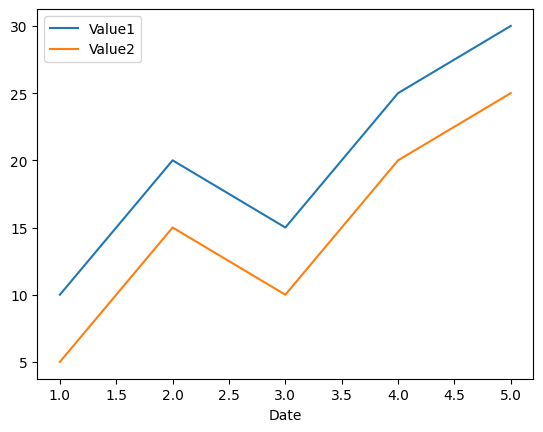

In [25]:
hi = pd.DataFrame({
  'Date': [1,2,3,4,5],
    'Value1': [10, 20, 15, 25, 30],
    'Value2': [5, 15, 10, 20, 25]
}).set_index("Date")

hi.plot()
plt.show()

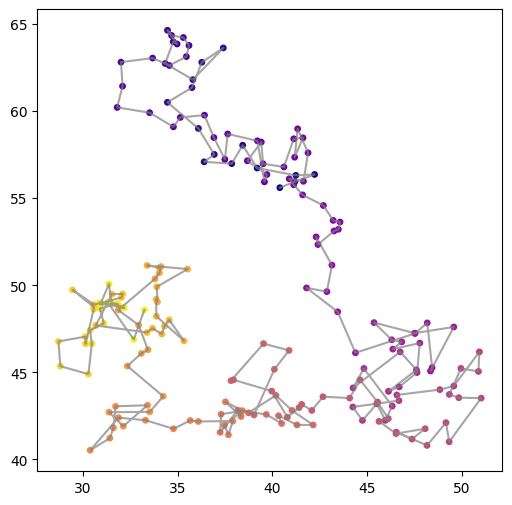

In [37]:
plt.figure(figsize=(6, 6))
plt.plot(series2['Series_A'], series2['Series_B'], color='gray', alpha=0.7, )
plt.scatter(series2['Series_A'], series2['Series_B'],
            c=np.arange(len(series2)), cmap='plasma', s=15)

In [ ]:
x = np.linspace(0, 2 * np.pi, 200)
sin_series = np.sin(x)
cos_series = np.cos(x)

In [41]:
x[5:10]

array([0.15786898, 0.18944277, 0.22101657, 0.25259036, 0.28416416])

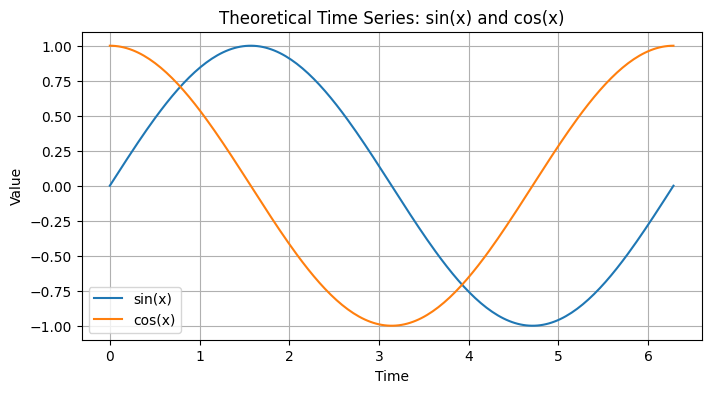

In [14]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=x, y=sin_series, label='sin(x)')
sns.lineplot(x=x, y=cos_series, label='cos(x)')
plt.title('Theoretical Time Series: sin(x) and cos(x)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

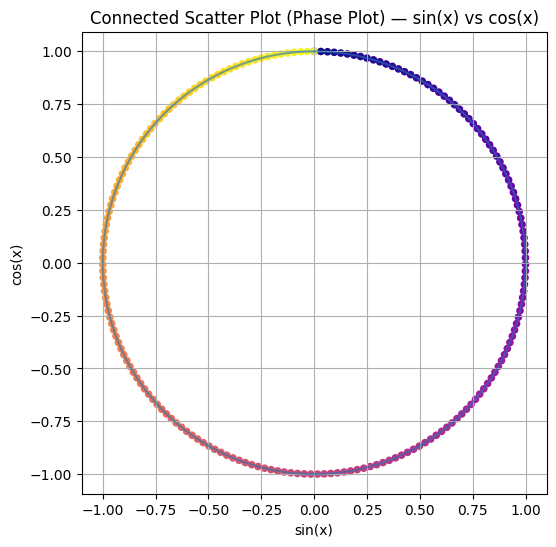

In [52]:
plt.figure(figsize=(6, 6))
plt.plot(sin_series, cos_series, alpha=0.6)
plt.scatter(sin_series, cos_series, c=np.arange(len(sin_series)), cmap='plasma', s=20)
plt.xlabel('sin(x)')
plt.ylabel('cos(x)')
plt.title('Connected Scatter Plot (Phase Plot) — sin(x) vs cos(x)')
plt.grid(True)
plt.axis('equal')
plt.show()